라이브러리 목록

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
warnings.filterwarnings(action='ignore')

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

import lightgbm as lgb
from sklearn.metrics import accuracy_score
from IPython.display import Image

데이터 불러오기

In [ ]:
df_Test = pd.read_csv('C:\\Users\\rdt9114\\Desktop\\BOAZ - 분석\\235713_신용카드 사용자 연체 예측 AI 경진대회_data\\open\\test.csv')
df_Train = pd.read_csv('C:\\Users\\rdt9114\\Desktop\\BOAZ - 분석\\235713_신용카드 사용자 연체 예측 AI 경진대회_data\\open\\train.csv')

In [ ]:
df_Train = pd.read_csv('mini_project_train.csv')
df_Test = pd.read_csv('mini_project_test.csv')

In [ ]:
df_Train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
# 결측치 확인 -> 2만 5천 개의 데이터에서 8천 개는 규모가 있으므로 제거가 아닌 채우는 방식 고려하였습니다
df_Train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

데이터 소개 및 분류 추가 

###############################ㅁ

# 1. Binart category 별 시각화(초록색)

In [ ]:
df_Train['gender'].value_counts()

F    17697
M     8760
Name: gender, dtype: int64

count    17697.000000
mean         1.518788
std          0.701732
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: credit, dtype: float64

count    8760.000000
mean        1.521119
std         0.703432
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: credit, dtype: float64


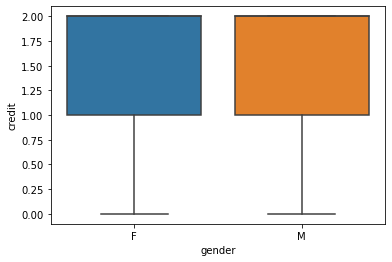

In [ ]:
sns.boxplot(x='gender', y='credit', data=df_Train)
print(df_Train[df_Train.gender=='F'].credit.describe())
print()
print(df_Train[df_Train.gender=='M'].credit.describe())

#유의미한 차이는 없음

In [ ]:
df_Train['reality'].value_counts()

Y    17830
N     8627
Name: reality, dtype: int64

In [ ]:
df_Train['car'].value_counts()

N    16410
Y    10047
Name: car, dtype: int64

In [ ]:
df_Train.groupby('car').mean()[['credit']]

,credit
car,
N,1.515296
Y,1.526525


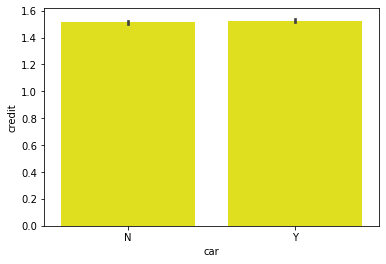

In [ ]:
# 범주형 데이터 시각화

sns.barplot(x = 'car', y = 'credit', data=df_Train, color = "yellow")
plt.show()

In [ ]:
# 신용등급 0, 1, 2별 3000명씩만 뽑기
df_0 = df_Train[ train['credit'] == 0 ]
df_1 = df_Train[ train['credit'] == 1 ]
df_2 = df_Train[ train['credit'] == 2 ]

df_0 = df_0.reset_index()
df_1 = df_1.reset_index()
df_2 = df_2.reset_index()

rand0 = np.random.choice(df_0.shape[0], 3000)
rand1 = np.random.choice(df_1.shape[0], 3000)
rand2 = np.random.choice(df_2.shape[0], 3000)

상범님 여기 위에 부분 설명 좀 추가해주세요
: 

In [ ]:
# Exp 데이터 프레임 = credit 별로 3000명 맞춘 데이터
df_Train_Exp = pd.concat([df_0.loc[rand0], df_1.loc[rand1], df_2.loc[rand2]], ignore_index = True)

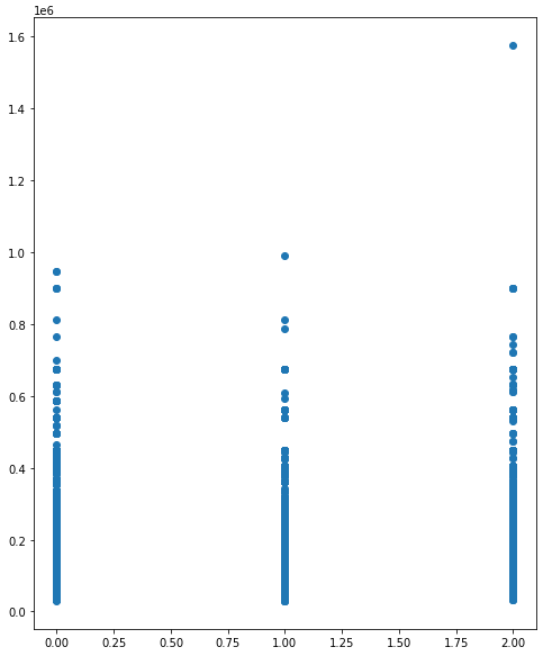

In [ ]:
df_Reality_Y = df_Train[df_Train['reality'] == 'Y']
df_Reality_N = df_Train[df_Train['reality'] == 'N']


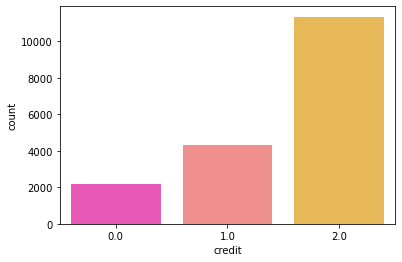

In [ ]:
sns.countplot('credit', palette = 'spring', data = df_Reality_Y)
plt.show()


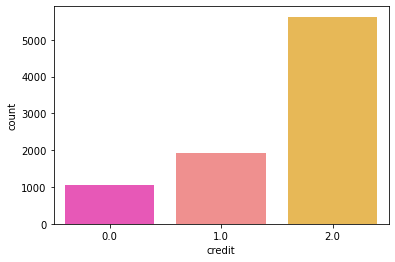

In [ ]:
sns.countplot('credit', palette = 'spring', data = df_Reality_N)
plt.show()

In [ ]:
df_Train['FLAG_MOBIL'].value_counts() #전처리 필요

1    26457
Name: FLAG_MOBIL, dtype: int64

######################################

# 2. Multi category

In [ ]:
df_Train.income_type.value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

<AxesSubplot:xlabel='income_type', ylabel='income_total'>

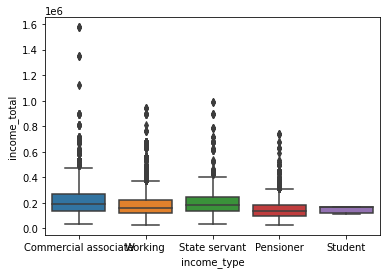

In [ ]:
sns.boxplot(x='income_type', y='income_total', data=df_Train)

In [ ]:
df_Train.edu_type.value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [ ]:
pd.crosstab(df_Train.credit, df_Train.edu_type)

#교육수준에 따라서 신용도의 분포가 유사하고, Academic degree에서는 샘플수가 작아서 조금의 오차를 보이는 것 같음

edu_type,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
credit,,,,,
0.0,2,909,114,28,2169
1.0,7,1751,246,59,4204
2.0,14,4502,660,170,11622


In [ ]:
df_Train.house_type.value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

In [ ]:
pd.crosstab(df_Train.credit, df_Train.house_type)

house_type,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
credit,,,,,,
0.0,14,2873,110,24,50,151
1.0,30,5569,160,48,147,313
2.0,66,15211,548,118,232,793


In [ ]:
#너무 많은 수준이 존재하므로, 상위 클래스로 묶어주는 작업 필요
#직업 자체가 없어서 결측치인 사람, 입력 오류로 결측치인 사람의 구분 필요
#근무일수가 없는 직업유형은 어떤 범주로 전처리 ?
df_Train.occyp_type.value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [ ]:
df_Train.occyp_type.isnull().sum() #전처리 필요

8171

### 분류 문제이기 때문에 라벨링 필요, 문자를 숫자 인덱스로 변경 필요

#######################################

# 3. numerical value

In [ ]:
df_Train.DAYS_BIRTH = -df_Train.DAYS_BIRTH

In [ ]:
df_Train.DAYS_BIRTH = df_Train.DAYS_BIRTH/365
df_Train.DAYS_BIRTH

0        38.079452
1        31.178082
2        52.293151
3        41.336986
4        41.197260
           ...    
26452    33.093151
26453    41.893151
26454    27.621918
26455    27.794521
26456    53.613699
Name: DAYS_BIRTH, Length: 26457, dtype: float64

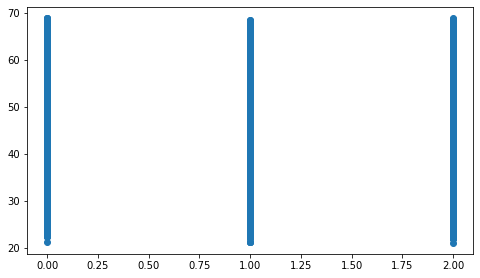

In [ ]:
plt.figure(figsize = (8, 10))
plt.subplot(212)
plt.scatter(df_Train['credit'],df_Train['DAYS_BIRTH'])
plt.show()

In [ ]:
df_Train['child_num'].value_counts() #아이 수가 14명, 7명, 19명??? 전처리 필요

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x22e65f30a60>,
 'caps': [<matplotlib.lines.Line2D at 0x22e6524ae80>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e65f30670>],
 'medians': [<matplotlib.lines.Line2D at 0x22e6524a070>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e65a72040>],
 'means': []}

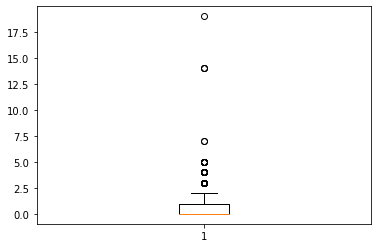

In [ ]:
plt.boxplot(df_Train.child_num)

#결국 자녀수가 7 이상인 샘플은 이상치로 판단되고, 6으로 치환해준다. 

In [ ]:
df_Train.at[df_Train.child_num>=6, 'child_num'] = 6

In [ ]:
df_Train['family_size'].value_counts() # 가족 사이즈가 20명? 15명? 자식 수랑 비교 필요

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x22e65aa2400>,
 'caps': [<matplotlib.lines.Line2D at 0x22e65a30c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e65aa2df0>],
 'medians': [<matplotlib.lines.Line2D at 0x22e65a30d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e65a39100>],
 'means': []}

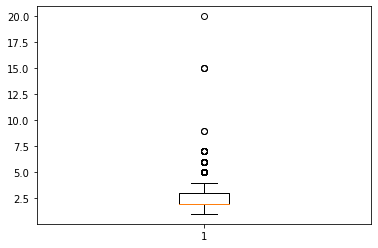

In [ ]:
plt.boxplot(df_Train.family_size)

In [ ]:
df_Train[(df_Train.child_num>=df_Train.family_size)][['child_num','family_size','family_type']]

,child_num,family_size,family_type
5825,1,1.0,Single / not married
14900,2,1.0,Married
16110,1,1.0,Single / not married
16791,1,1.0,Married
18879,1,1.0,Civil marriage
21096,1,1.0,Married


In [ ]:
print(df_Train[df_Train.child_num==7].family_type.value_counts())
print(df_Train[df_Train.child_num==14].family_type.value_counts())
print(df_Train[df_Train.child_num==19].family_type.value_counts())

#자녀 수가 19인 사람은 결혼도 안한 사람인데 자녀수가 19명이므로 제거가 필요

Series([], Name: family_type, dtype: int64)
Series([], Name: family_type, dtype: int64)
Series([], Name: family_type, dtype: int64)


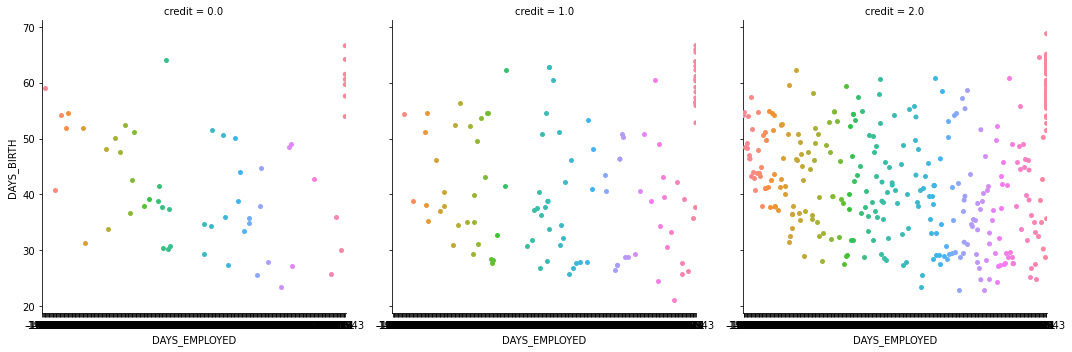

In [ ]:
rand = np.random.choice(df_Train.shape[0], 500)

# 1. 전반적으로 나이가 어림
# 2. 나이가 많을수록 업무일 수도 많음
sns.catplot(x = 'DAYS_EMPLOYED', y = 'DAYS_BIRTH', data = df_Train.loc[rand], col = 'credit', col_wrap=3)
plt.show()

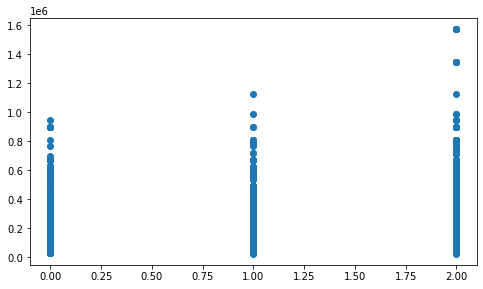

In [ ]:
# 연속형 데이터 시각화

# 분석 내용 1. 신용등급이 가장 낮은 그룹이 총 수입이 높게 분포 
# -> 샘플의 갯수를 세어보니 약 13000개 정도 많음 
# -> 가장 적은 등급의 샘플 갯수를 기준으로 랜덤 샘플링 
# -> 이상하다고 생각할 정도는 아닌 결과

plt.figure(figsize = (8, 10))
plt.subplot(211)
plt.scatter(df_Train['credit'], df_Train['income_total'])

In [ ]:
df_Train['income_total'].groupby(df_Train['credit']).describe()

#실제로 신용도가 높은 사람들의 연간 소득이 높은 것을 확인할 수 있었음

,count,mean,std,min,25%,50%,75%,max
credit,,,,,,,,
0.0,3222.0,190807.582402,102139.548208,29250.0,126000.0,162000.0,225000.0,945000.0
1.0,6267.0,181122.701532,92548.262258,27000.0,117000.0,157500.0,225000.0,1125000.0
2.0,16968.0,188925.666991,104981.727565,27000.0,121500.0,157500.0,225000.0,1575000.0


In [ ]:
df_Train['DAYS_EMPLOYED'] = np.where(df_Train['DAYS_EMPLOYED']>0, 0, -df_Train['DAYS_EMPLOYED'])
df_Train.DAYS_EMPLOYED.describe()

count    26457.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
print(sum((df_Train.DAYS_BIRTH)<(df_Train.DAYS_EMPLOYED)), '으로 근무일수가 태어난 날보다 많은 이상치는 없었음')

0 으로 근무일수가 태어난 날보다 많은 이상치는 없었음


In [ ]:
df_Train['begin_month'].value_counts()

-7.0     662
-11.0    617
-8.0     612
-3.0     593
-6.0     591
        ... 
-58.0    244
-59.0    242
-60.0    235
 0.0     231
-57.0    228
Name: begin_month, Length: 61, dtype: int64

In [ ]:
df_Train.begin_month = (-1)*df_Train.begin_month   

##############################################

### 가설 정리

### 1. 자녀 수가 5 초과인 고객은 이상치 일 것이다.

### 2. 자녀 수가 가족 수보다 큰 사람이면 이상치가 아닐 것이다.

### 3. 직업 유형에서의 null 값이 존재하므로 결측치 처리가 필요하다

### 4. FLAG_MOBIL 값이 모두 1이므로 컬럼 삭제

### 5. 연간소득이 1200,000 초과인 이상 데이터는 전처리 필요

### 6. 업무시작일(days_employed가 0이상인 데이터는 전처리 필요)

### 7. 결혼을 했는데 자식이 있는 경우 전처리 필요

### 8. 가족 규모가 8이상인 값은 특이한 값을 가지므로 최대의 가족수를 모두 8로 치환해준다.

### 9. days_birth 부호 변경과 함께, 나이로 직관적인 판단을 위해서 년 단위로 치환

### 10. Multi Category Data : 텍스터 데이터로 표기된 값을 index화된 수치 데이터로 변환이 필요해 labelincoder를 통해 변환

```
```
### 데이터 전처리

In [ ]:
df_Test = pd.read_csv('C:\\Users\\rdt9114\\Desktop\\BOAZ - 분석\\235713_신용카드 사용자 연체 예측 AI 경진대회_data\\open\\test.csv')
df_Train = pd.read_csv('C:\\Users\\rdt9114\\Desktop\\BOAZ - 분석\\235713_신용카드 사용자 연체 예측 AI 경진대회_data\\open\\train.csv')

In [ ]:
#학습데이터


df_Train = pd.get_dummies(df_Train, columns = ['gender','car','reality'])
label_encoder=preprocessing.LabelEncoder()
df_Train['income_type']=label_encoder.fit_transform(df_Train['income_type'])
########################################################################
df_Train['edu_type']=label_encoder.fit_transform(df_Train['edu_type'])
########################################################################
df_Train['family_type']=label_encoder.fit_transform(df_Train['family_type'])
########################################################################
df_Train['house_type']=label_encoder.fit_transform(df_Train['house_type'])
########################################################################
df_Train.at[(df_Train.occyp_type.isnull())&(df_Train.DAYS_EMPLOYED>=0), 'occyp_type'] = 'not_work'  #경력없는 결측치 -> 일해본적없음
#df_Train.dropna(axis=0, inplace=True) #경력있는 결측치 -> 일단 삭제
df_Train.at[df_Train.occyp_type.isnull(), 'occyp_type'] = 'NAN'

df_Train['occyp_type']=label_encoder.fit_transform(df_Train['occyp_type'])

df_Train.at[df_Train.income_total>1200000,'income_total'] = 1200000 #연간소득
df_Train.at[df_Train.family_size>8, 'family_size'] = 8              #가족규모
df_Train.begin_month = (-1)*df_Train.begin_month                    #신용카드발급월
df_Train.DAYS_BIRTH = (-1)*df_Train.DAYS_BIRTH /365                 #출생일
df_Train.at[df_Train.DAYS_EMPLOYED>0,'DAYS_EMPLOYED'] = 0           #업무시작일
df_Train.DAYS_EMPLOYED = (-1)*df_Train.DAYS_EMPLOYED/30
df_Train.at[df_Train.child_num>=6, 'child_num'] = 6                 #자녀수

df_Train = df_Train.drop(['index', 'FLAG_MOBIL'], axis = 1)            #자녀수

In [ ]:
#테스트데이터

df_Test = pd.get_dummies(df_Test, columns = ['gender','car','reality'])
label_encoder=preprocessing.LabelEncoder()
df_Test['income_type']=label_encoder.fit_transform(df_Test['income_type'])
########################################################################
df_Test['edu_type']=label_encoder.fit_transform(df_Test['edu_type'])
########################################################################
df_Test['family_type']=label_encoder.fit_transform(df_Test['family_type'])
########################################################################
df_Test['house_type']=label_encoder.fit_transform(df_Test['house_type'])
########################################################################
df_Test.at[(df_Test.occyp_type.isnull())&(df_Test.DAYS_EMPLOYED>=0), 'occyp_type'] = 'not_work'  #경력없는 결측치 -> 일해본적없음
#df_Train.dropna(axis=0, inplace=True) #경력있는 결측치 -> 일단 삭제
df_Test.at[df_Test.occyp_type.isnull(), 'occyp_type'] = 'NAN'

df_Test['occyp_type']=label_encoder.fit_transform(df_Test['occyp_type'])

df_Test.at[df_Test.income_total>1200000,'income_total'] = 1200000 #연간소득
df_Test.at[df_Test.family_size>8, 'family_size'] = 8              #가족규모
df_Test.begin_month = (-1)*df_Test.begin_month                    #신용카드발급월
df_Test.DAYS_BIRTH = (-1)*df_Test.DAYS_BIRTH /365                 #출생일
df_Test.at[df_Test.DAYS_EMPLOYED>0,'DAYS_EMPLOYED'] = 0           #업무시작일
df_Test.DAYS_EMPLOYED = (-1)*df_Test.DAYS_EMPLOYED/30
df_Test.at[df_Test.child_num>=6, 'child_num'] = 6                 #자녀수

df_Test = df_Test.drop(['index', 'FLAG_MOBIL'], axis = 1)

```


```
### Modeling 및 성능평가지표 선정

1. 중복적 의미를 가지는 가변수 제외

In [ ]:
train_x = df_Train.drop(['credit','gender_F','car_N','reality_N'], axis=1)
train_y = df_Train.credit

test_x = df_Test.drop(['gender_F','car_N','reality_N'], axis=1)

2. 결과의 재현성을 위한 시드값은 2020으로 통일

3. 성능평가지표 Log loss의 사용

```
3-1. Log loss란 ?

3-2. 선택 이유
이진 분류 과제에서 주로 사용하는 성능평가지표는 정오행렬을 기반으로한 정확도, 정밀도, 재현율 등이 존재함.
하지만 해당 과제는 다항 분류로, 성능평가지표 계산을 위해 3x3의 정오행렬이 생성됨. (채워져야할 칸이 너무 많음(?))
또한 예측이 틀린 정도에 따라 경우에 패널티가 바뀌는 성능평가지표로 판단하고자 하였음.
```


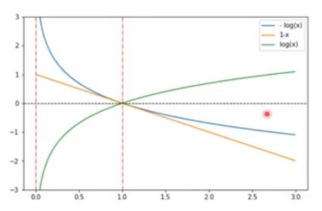

In [ ]:
Image('logloss.jpg')

### (1) Light GBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(n_estimators=400)
np.random.seed(2020)
lgbm_model.fit(train_x, train_y,verbose=True)
result_lgbm = lgbm_model.predict_proba(test_x) 

In [ ]:
result_lgbm

array([[0.04215235, 0.11727961, 0.84056804],
       [0.2554878 , 0.13525832, 0.60925388],
       [0.03598366, 0.05209257, 0.91192377],
       ...,
       [0.02640005, 0.0967554 , 0.87684456],
       [0.09001884, 0.18555992, 0.72442124],
       [0.07369236, 0.3162416 , 0.61006604]])

In [ ]:
submi_lgbm = pd.DataFrame(result_lgbm)
submi_lgbm['index'] = np.arange(26457, 36457)
submi_lgbm = submi_lgbm[['index',0,1,2]]
submi_lgbm

,index,0,1,2
0,26457,0.042152,0.117280,0.840568
1,26458,0.255488,0.135258,0.609254
2,26459,0.035984,0.052093,0.911924
3,26460,0.137361,0.140733,0.721906
4,26461,0.087158,0.128532,0.784309
...,...,...,...,...
9995,36452,0.098218,0.197139,0.704643
9996,36453,0.148934,0.260566,0.590501
9997,36454,0.026400,0.096755,0.876845
9998,36455,0.090019,0.185560,0.724421


### (2) Cat Boost

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(learning_rate=0.05, iterations=5000)
np.random.seed(2020)
cat.fit(train_x, train_y, early_stopping_rounds=100, verbose=300)
result = cat.predict_proba(test_x)

0:	learn: 1.0697049	total: 171ms	remaining: 14m 16s
300:	learn: 0.7534762	total: 7.72s	remaining: 2m
600:	learn: 0.7098401	total: 15s	remaining: 1m 49s
900:	learn: 0.6770550	total: 22.6s	remaining: 1m 43s
1200:	learn: 0.6494836	total: 29.8s	remaining: 1m 34s
1500:	learn: 0.6267634	total: 36.9s	remaining: 1m 26s
1800:	learn: 0.6047805	total: 44.2s	remaining: 1m 18s
2100:	learn: 0.5867632	total: 52.5s	remaining: 1m 12s
2400:	learn: 0.5700053	total: 60s	remaining: 1m 4s
2700:	learn: 0.5545074	total: 1m 7s	remaining: 57.7s
3000:	learn: 0.5407359	total: 1m 15s	remaining: 50s
3300:	learn: 0.5272693	total: 1m 22s	remaining: 42.3s
3600:	learn: 0.5147162	total: 1m 29s	remaining: 34.7s
3900:	learn: 0.5031963	total: 1m 36s	remaining: 27.3s
4200:	learn: 0.4914841	total: 1m 43s	remaining: 19.8s
4500:	learn: 0.4807274	total: 1m 50s	remaining: 12.3s
4800:	learn: 0.4709178	total: 1m 58s	remaining: 4.89s
4999:	learn: 0.4646923	total: 2m 2s	remaining: 0us


In [ ]:
submi_cat = pd.DataFrame(result)
submi_cat['index'] = np.arange(26457, 36457)
submi_cat = submi_cat[['index',0,1,2]]
submi_cat

,index,0,1,2
0,26457,0.017754,0.027215,0.955031
1,26458,0.215099,0.133738,0.651162
2,26459,0.043745,0.132273,0.823982
3,26460,0.076875,0.078490,0.844635
4,26461,0.087195,0.270207,0.642598
...,...,...,...,...
9995,36452,0.113252,0.186596,0.700152
9996,36453,0.203086,0.256848,0.540066
9997,36454,0.007769,0.051064,0.941167
9998,36455,0.093728,0.303976,0.602296


### (3) XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=400, objective = 'multi:softprob', learning_rate=0.1, max_depth=3)
np.random.seed(2020)
xgb_model.fit(train_x, train_y)
result11 = xgb_model.predict_proba(test_x)

[03:22:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
submi_xgb = pd.DataFrame(result11)
submi_xgb['index'] = np.arange(26457, 36457)
submi_xgb = submi_xgb[['index',0,1,2]]
submi_xgb

,index,0,1,2
0,26457,0.076772,0.200647,0.722580
1,26458,0.126175,0.167108,0.706716
2,26459,0.108816,0.184138,0.707046
3,26460,0.111668,0.146806,0.741525
4,26461,0.084213,0.157079,0.758708
...,...,...,...,...
9995,36452,0.104150,0.230961,0.664890
9996,36453,0.103007,0.247734,0.649259
9997,36454,0.034301,0.091433,0.874266
9998,36455,0.071080,0.171955,0.756965


```


```
### Modeling Result

모델링 후 Log loss 산출
```
- LightGBM : 0.73212
- CatBoost : 0.73823
- XGBoost  : 0.78253
```
Log loss 값이 낮은 LightGBM을 최종적으로 선택함

### 아쉬운 점

1. 자녀수와 결혼여부/가족수 관계에서 이상치로 판단된 샘플 6개/509개 처리
```
LightGBM으로 구축한 Baseline Model의 성능향상을 위해서, 분석 과정에서 세운 가설에 대한 처리를 시행해보았음.
자녀수는 가족수에 포함되는 관계이므로 '자녀수가 가족수보다 많거나 같으면 이상치일 것'이라고 생각하였고,
결혼여부 범주 수준 중에서 '싱글/미혼(Single/Not married)인 샘플은 자녀수가 0일 것'이라고 생각하였음.
하지만 전처리 후 모델링한 결과, Log loss 값이 올라갔고 확실히 모순되어 보이는 샘플에 대한 
적절한 전처리 방향을 잡지 못한 것에 아쉬움이 남았음.
```


2. 비금융 데이터 활용
```
해당 데이터는 고객의 자산포트폴리오, Demo와 관련된 컬럼만 존재했음.
현재 금융권에서는 금융과 비금융 데이터을 결합한 데이터를 통해 연체 예측, 여신 심사 등에 필요한 Modeling에 활용하고 있음.
이후 금융 관련 데이터 분석에서 비금융 데이터와 결합된 데이터 분석도 시도하고 싶음.
```